In [1]:
import scipy.io as sio
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import timeit
plt.rcParams['figure.figsize'] = [15, 10]
ds = sio.loadmat('face.mat')

In [2]:
X = ds['X']
l = ds['l'][0]
split = 0.8
W = 46
H = 56
X = pd.DataFrame(X.transpose())
N = X.shape[0]*split
l = pd.DataFrame(l)

In [3]:
X_train, X_test, l_train, l_test = train_test_split(X, l, test_size=(1-split))
# X_bar = np.mean(X, axis=1)
X_train, X_test = np.transpose(X_train.values), np.transpose(X_test.values)
X_bar = np.transpose([np.mean(X_train, axis=1)])

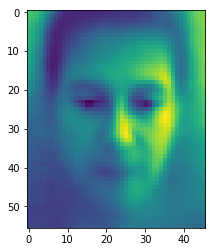

In [4]:
A = np.subtract(X_train,X_bar)
# print(A.shape)
# print(np.transpose(X_train)[0]/255)
mean_img = np.transpose(np.array_split(np.concatenate(X_bar,axis=0)/255, W))
person = np.transpose(np.array_split(np.transpose(X_train)[0]/255, W))
# print(person)
imgplot = plt.imshow(mean_img)

In [5]:

# print(X_bar)
start = timeit.default_timer()
S = np.matmul(A,np.transpose(A))/N
w, v = np.linalg.eig(S)
print(w[0])
print(v[0])

(921430.4595143552+0j)
[ 0.01482622+0.j          0.01532448+0.j          0.01817134+0.j
 ... -0.00018863-0.00017184j  0.00037955-0.00037514j
  0.00037955+0.00037514j]


c:\users\georg\appdata\local\programs\python\python35\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


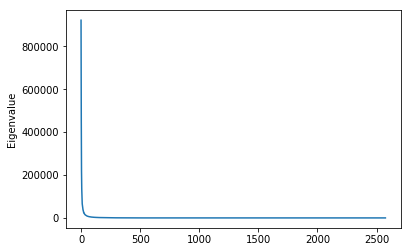

In [6]:
inds = w.argsort()[::-1]
w = w[inds]
v = v[:,inds]
plt.plot(w)
plt.ylabel('Eigenvalue')
plt.show()
end = timeit.default_timer()

In [7]:
threshold = 1000 #Edit thos threhold? 


non_zero_w = list(filter(lambda x: x > threshold, w))

non_zero_w = np.asarray(non_zero_w)

print(w.shape)
# print(w[0])
print(non_zero_w.shape)
# print(non_zero_w)

(2576,)
(207,)


In [8]:
print(end-start)
# print(X_bar)

start = timeit.default_timer()
S_LDA = np.matmul(np.transpose(A),A)/N
w_lda, v_lda = np.linalg.eig(S_LDA)

15.443185837868036


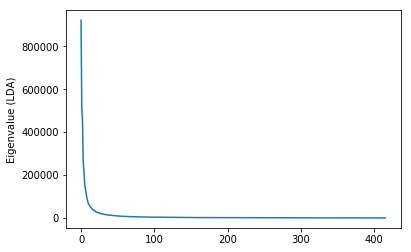

In [9]:
inds = w_lda.argsort()[::-1]
w_lda = w_lda[inds]
v_lda = v_lda[:,inds]
plt.plot(w_lda)
plt.ylabel('Eigenvalue (LDA)')
plt.show()
end = timeit.default_timer()

In [10]:
print(end-start)

0.6723387837294759


c:\users\georg\appdata\local\programs\python\python35\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


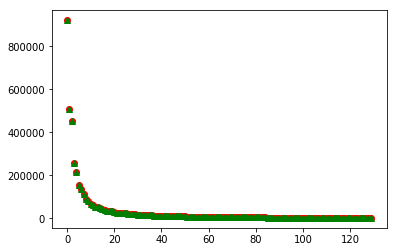

In [11]:
size = 130
plt.plot(np.arange(size),w[:size], 'ro',  np.arange(size), w_lda[:size], 'g^')
plt.show()

c:\users\georg\appdata\local\programs\python\python35\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


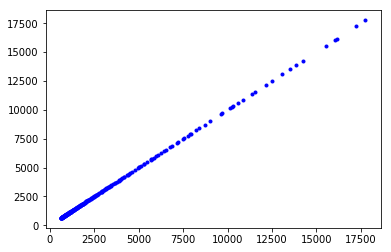

In [12]:
size = 260
plt.plot(w[30:size], w_lda[30:size], 'b.')
plt.show()

In [13]:
diff = w[:100]-w_lda[:100]
value = np.dot(diff,np.transpose(diff))/100
print(value)

(6.148656418281738e-20+0j)


#### Timing taken for sample size. LDA and HDA

In [67]:
start = timeit.default_timer()
S = np.matmul(A,np.transpose(A))/N
print(np.linalg.matrix_rank(S))
w, v = np.linalg.eigh(S)
inds = w.argsort()[::-1]
w = w[inds]
v = v[:,inds]
end = timeit.default_timer()
print(end-start)

start = timeit.default_timer()
S_LDA = np.matmul(np.transpose(A),A)/2576
w_lda, v_lda = np.linalg.eigh(S_LDA)
print(np.linalg.matrix_rank(S_LDA))
inds = w_lda.argsort()[::-1]
w_lda = w_lda[inds]
v_lda = v_lda[:,inds]
# print(wv)
end = timeit.default_timer()
print(end-start)

415
12.377834691009411
415
0.18834754462295678


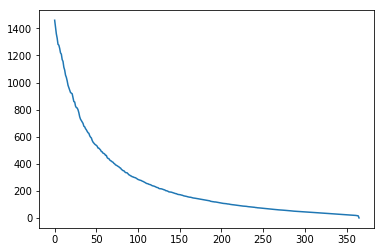

In [68]:
plt.plot(w_lda[50:])

In [73]:
#the number of non zero elements is the same as the number of images you put in. 
#Chosing M to contain the on zero eigen values equates it to N
#This makes the two methods only differ by the eigen values aquired

th = 0.0001
i = 0
for w_val in w:
    if th < w_val:
        i+=1
#     else:
#         print(i)
#         print(w_val)
print(i)
filt = list(filter(lambda x: x > th, w))
filt = np.asarray(filt)

filt_lda = list(filter(lambda x: x > th, w_lda))
filt_lda = np.asarray(filt_lda)

print(filt.shape)
print(filt_lda.shape)

415
(415,)
(415,)


In [17]:
print(w[400:])
print(w_lda[400:])

[ 1.48833121e+02+0.00000000e+00j  1.43529835e+02+0.00000000e+00j
  1.40788681e+02+0.00000000e+00j ... -1.77102682e-11-1.27413957e-11j
 -2.09461888e-11+2.64358717e-12j -2.09461888e-11-2.64358717e-12j]
[2.40351623e+01 2.31787312e+01 2.27360603e+01 2.25142289e+01
 2.20766976e+01 2.12143329e+01 2.07789721e+01 2.06485139e+01
 1.94315542e+01 1.92272591e+01 1.86691389e+01 1.83734894e+01
 1.75184609e+01 1.67541194e+01 1.55137891e+01 1.30902812e-12]


In [49]:
thing = 0
for i in range(415):
    weight = w[i]*np.conj(w[i])
    val = w[i]-w_lda[i]
    val = val*np.conj(val)
    thing += val/weight
    
print(thing.real)
    


291.7856178388169
